Download Lena color image, convert it to grayscale image and add salt and pepper noise with noise quantity 0.1,0.2 upto 1 and generate 10 noisy images.

1. Do average filtering ( by correlating with average filter ) of varying sizes for each image. Filter size can be 3*3, 5*5, 7*7. (In 3*3 filter all the values are 1/9, in 5*5 filter all the values are 1/25 and in 7*7 filter all the values are 1/49)

2. Similarly, repeat question 1 by replacing the average filter by median filter.


# Ques1


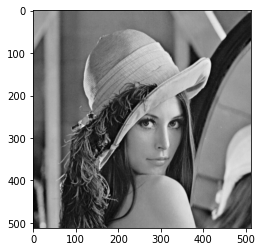

In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.util import random_noise

lena = cv2.imread('Lena.png', 0)
plt.imshow(lena, cmap='gray')
plt.show()


In [30]:
# adding salt and pepper noise

splist=[]
quant=0.1
for i in range(10):
    salt = random_noise(lena, mode='s&p', amount=quant)
    salt=  np.array(255*salt, dtype=np.uint8)
    quant = quant+0.1
    splist.append(salt)

In [60]:
def avg_filter(img, f):
    f_new = np.zeros([img.shape[0]+f.shape[0]-1,img.shape[1]+f.shape[1]-1])
    b=int((f.shape[0]-1)/2)
    a=int((f.shape[1]-1)/2)

    n1=np.array(img)
    n1=np.pad(n1,pad_width=b,mode='constant',constant_values=0)

    for x in range(0,img.shape[0]+f.shape[0]-b):
        for y in range(0,img.shape[1]+f.shape[1]-b):
            for j in range(-1*b,b):
                for i in range(-1*a,a):
                    f_new[x,y]+=np.multiply(n1[x+i,y+j],f[i,j])
    return f_new


In [61]:
f1=np.zeros([3,3])
f1.fill(1/9)
f2=np.zeros([5,5])
f2.fill(1/25)
f3=np.zeros([7,7])
f3.fill(1/49)

avg3=[]
avg5=[]
avg7=[]

for i in range(10):
    f1_new=avg_filter(splist[i],f1)
    avg3.append(f1_new)

    f2_new=avg_filter(splist[i],f2)
    avg5.append(f2_new)

    f3_new=avg_filter(splist[i],f3)
    avg7.append(f3_new)


In [74]:
print("Average Filter 3x3")
plt.figure(figsize=(30,30))
#change figure
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(avg3[i], cmap='gray')

Average Filter 3x3


AttributeError: module 'matplotlib.pyplot' has no attribute 'figsize'

Average Filter 5x5


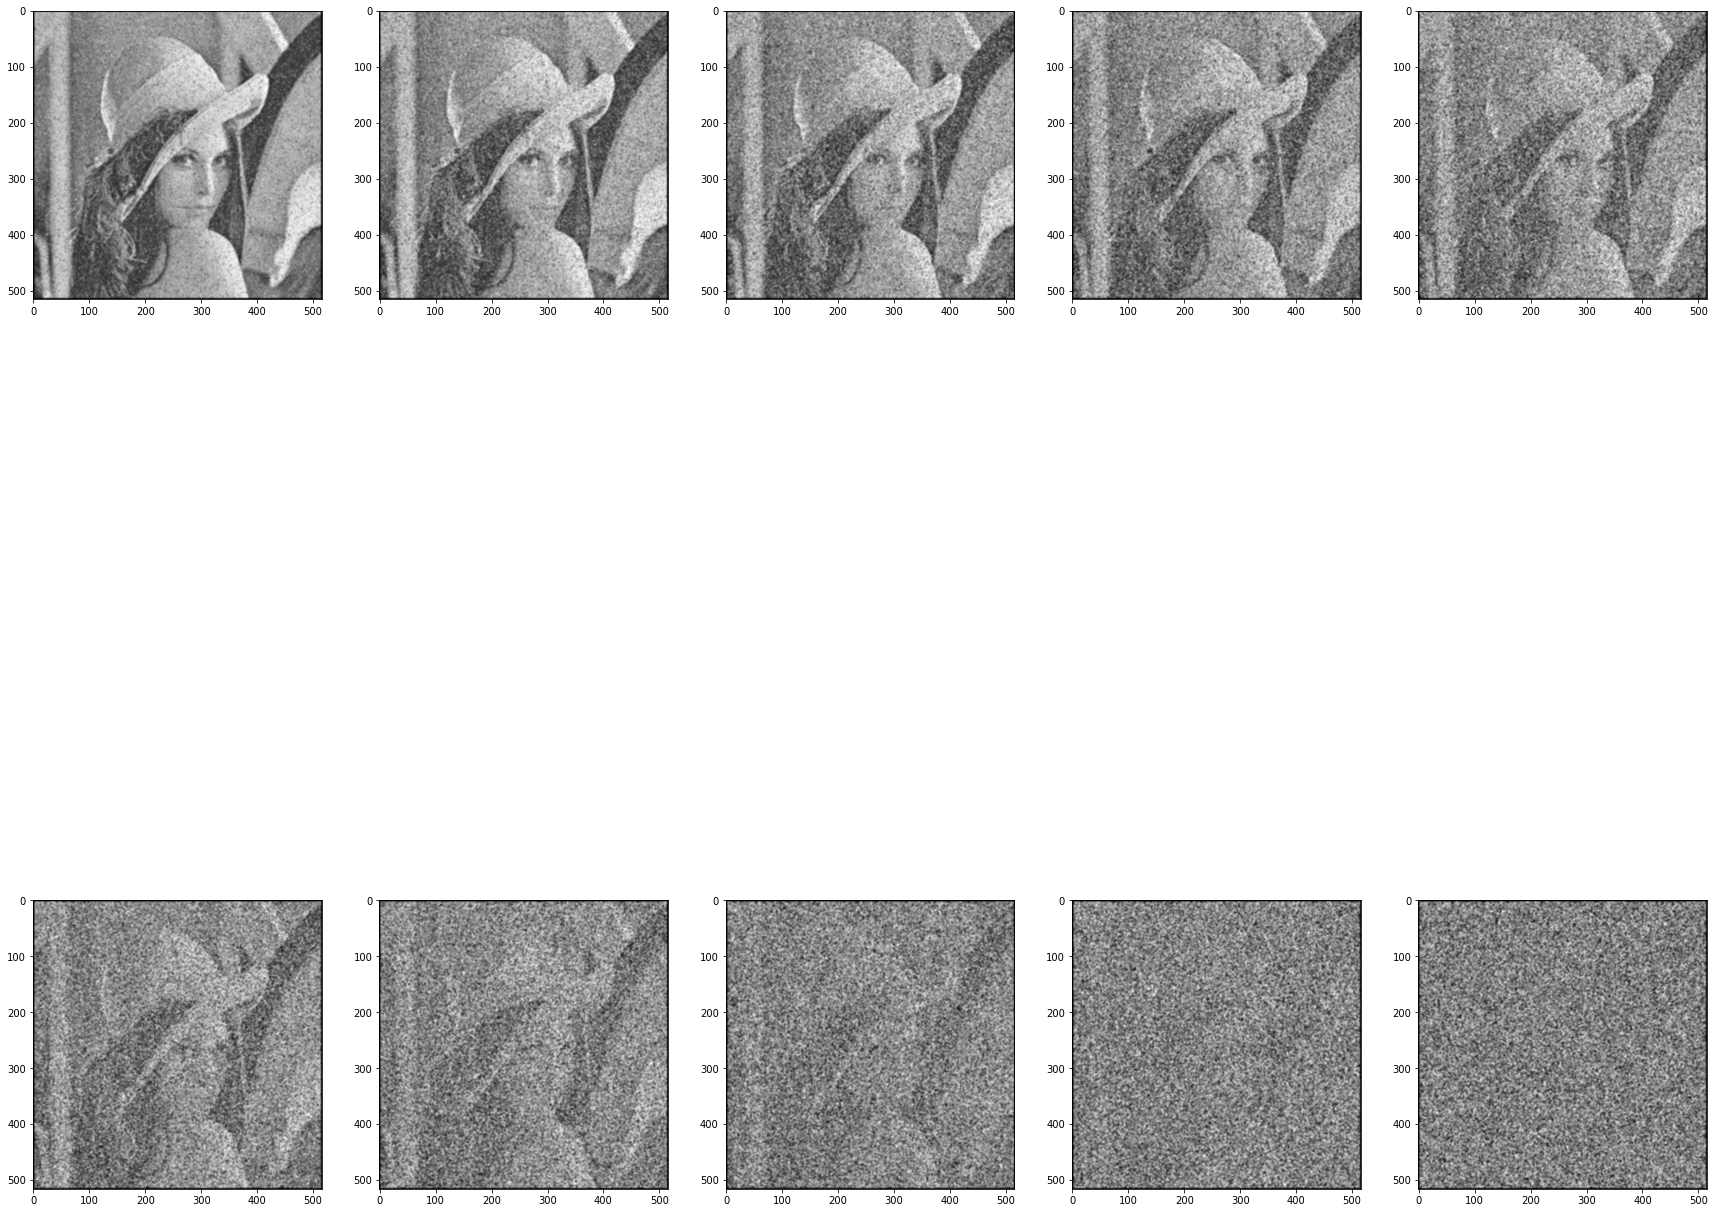

In [67]:
print("Average Filter 5x5")
plt.figure(figsize=(30,30))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(avg5[i], cmap='gray')




Average Filter 7x7


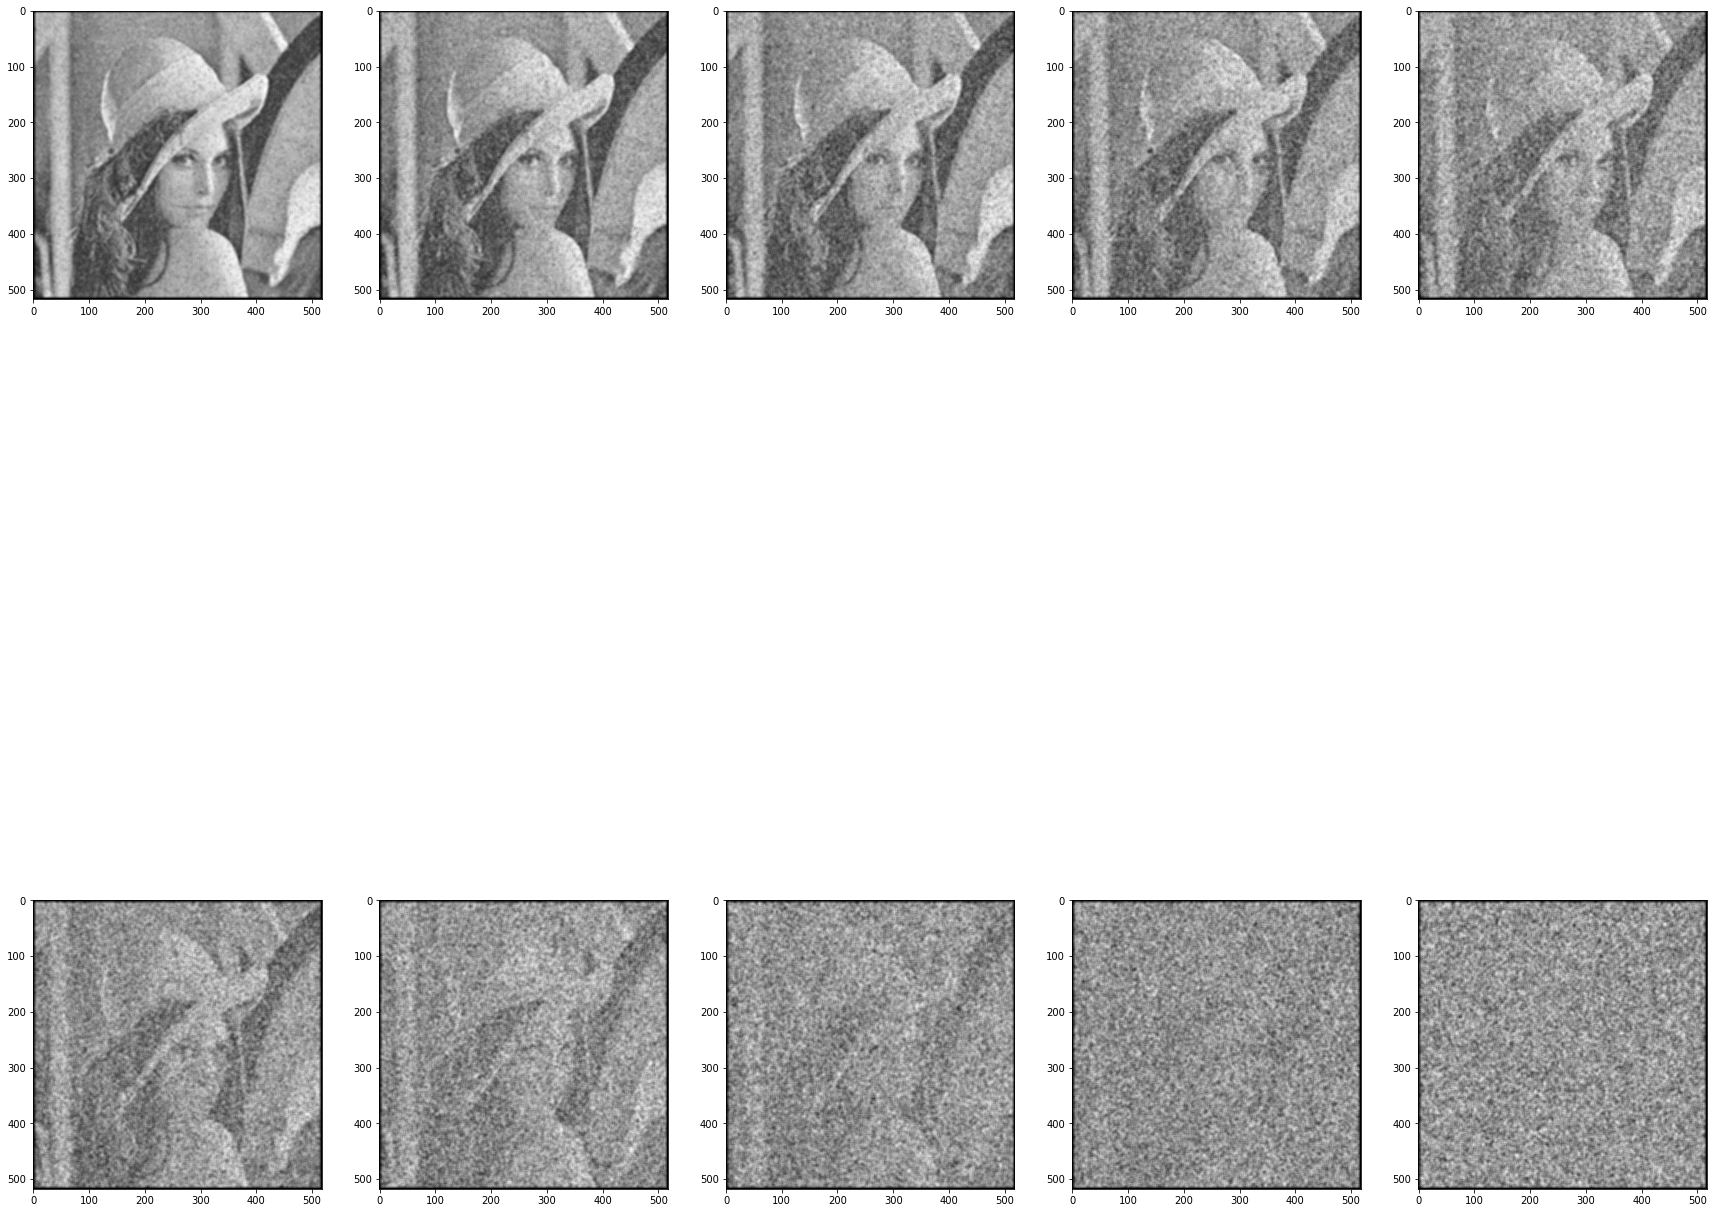

In [66]:
print("Average Filter 7x7")
plt.figure(figsize=(30,30))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(avg7[i], cmap='gray')

# Ques2
Median Filtering

In [48]:
def median_filter(data, filter_size):
    temp = []
    indexer = filter_size // 2
    data_final = []
    data_final = np.zeros((len(data),len(data[0])))
    for i in range(len(data)):
        for j in range(len(data[0])):
            for z in range(filter_size):
                if i + z - indexer < 0 or i + z - indexer > len(data) - 1:
                    for c in range(filter_size):
                        temp.append(0)
                else:
                    if j + z - indexer < 0 or j + indexer > len(data[0]) - 1:
                        temp.append(0)
                    else:
                        for k in range(filter_size):
                            temp.append(data[i + z - indexer][j + k - indexer])

            temp.sort()
            data_final[i][j] = temp[len(temp) // 2]
            temp = []
    return data_final

median_filtered3=[]
median_filtered5=[]
median_filtered7=[]

for i in range(10):
    median_filtered3.append(median_filter(splist[i],3))
    median_filtered5.append(median_filter(splist[i],5))
    median_filtered7.append(median_filter(splist[i],7))

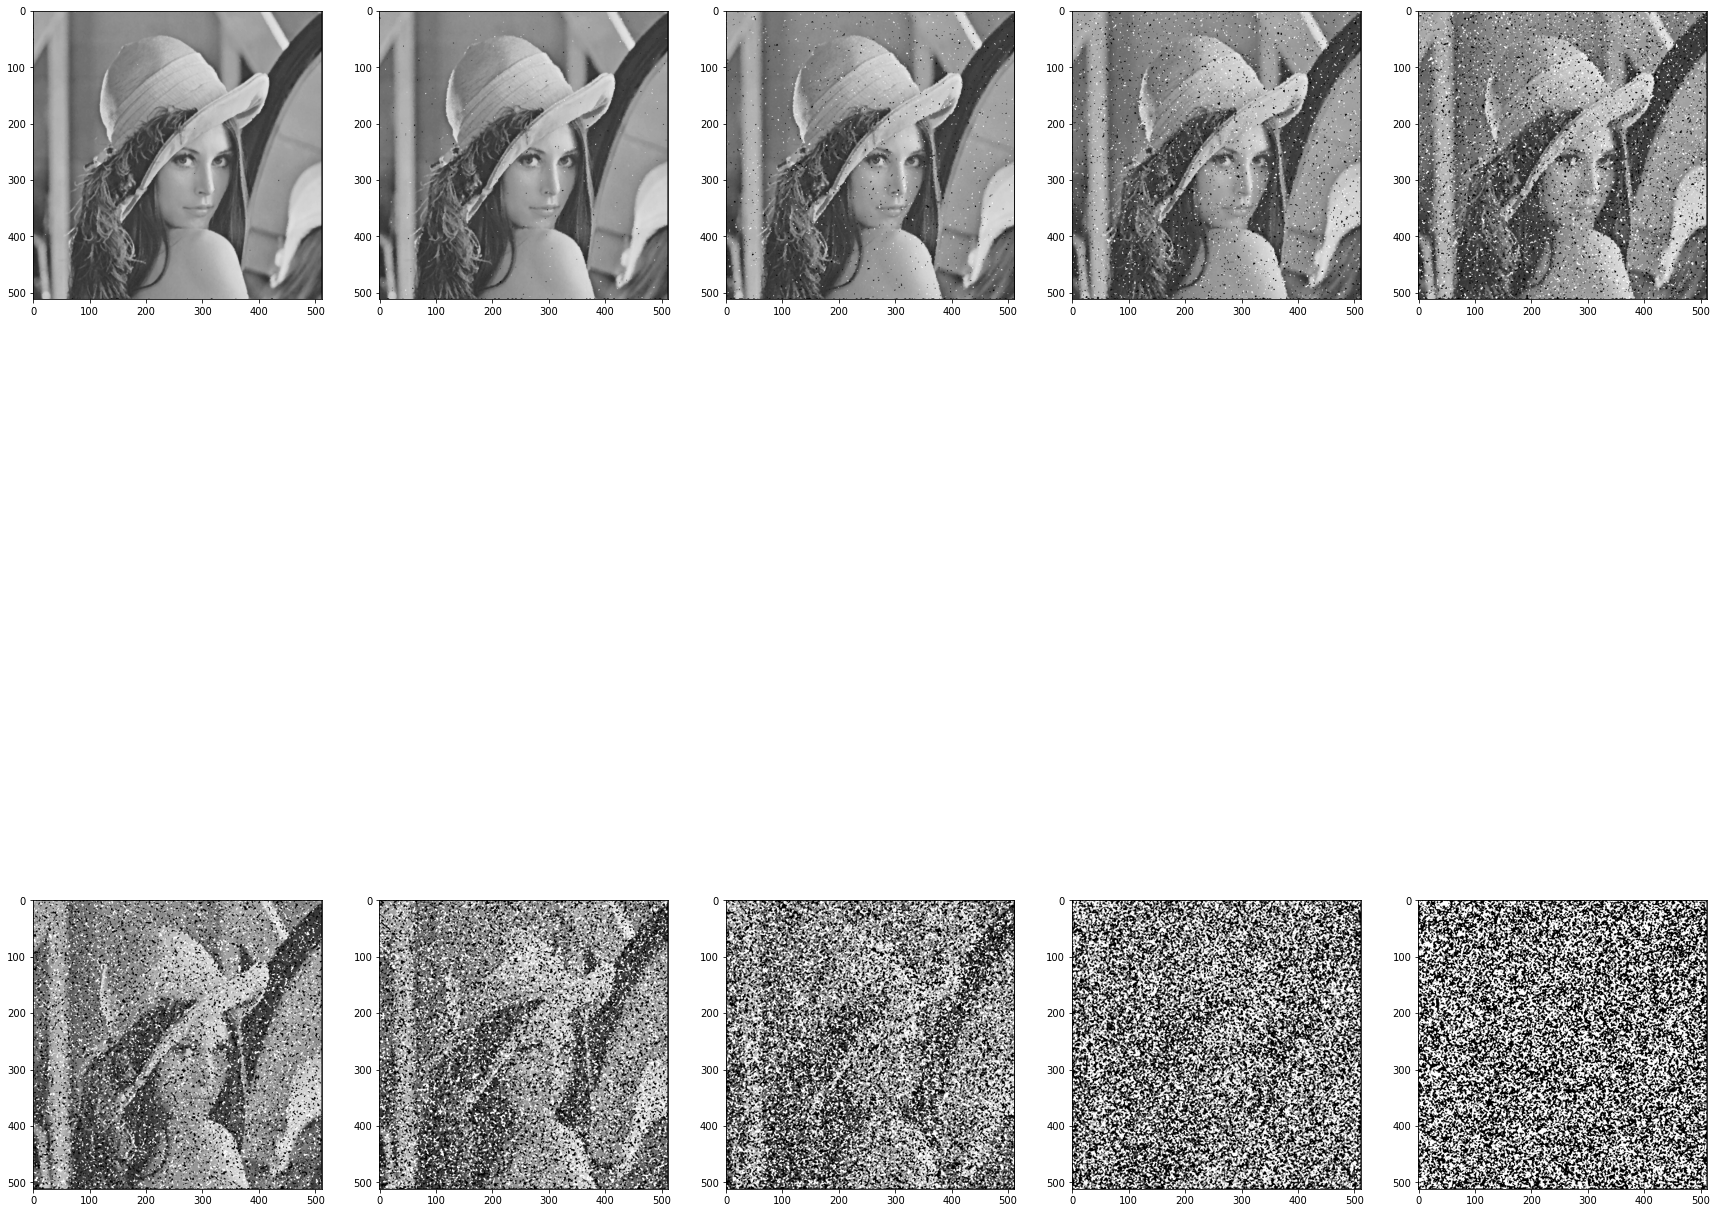

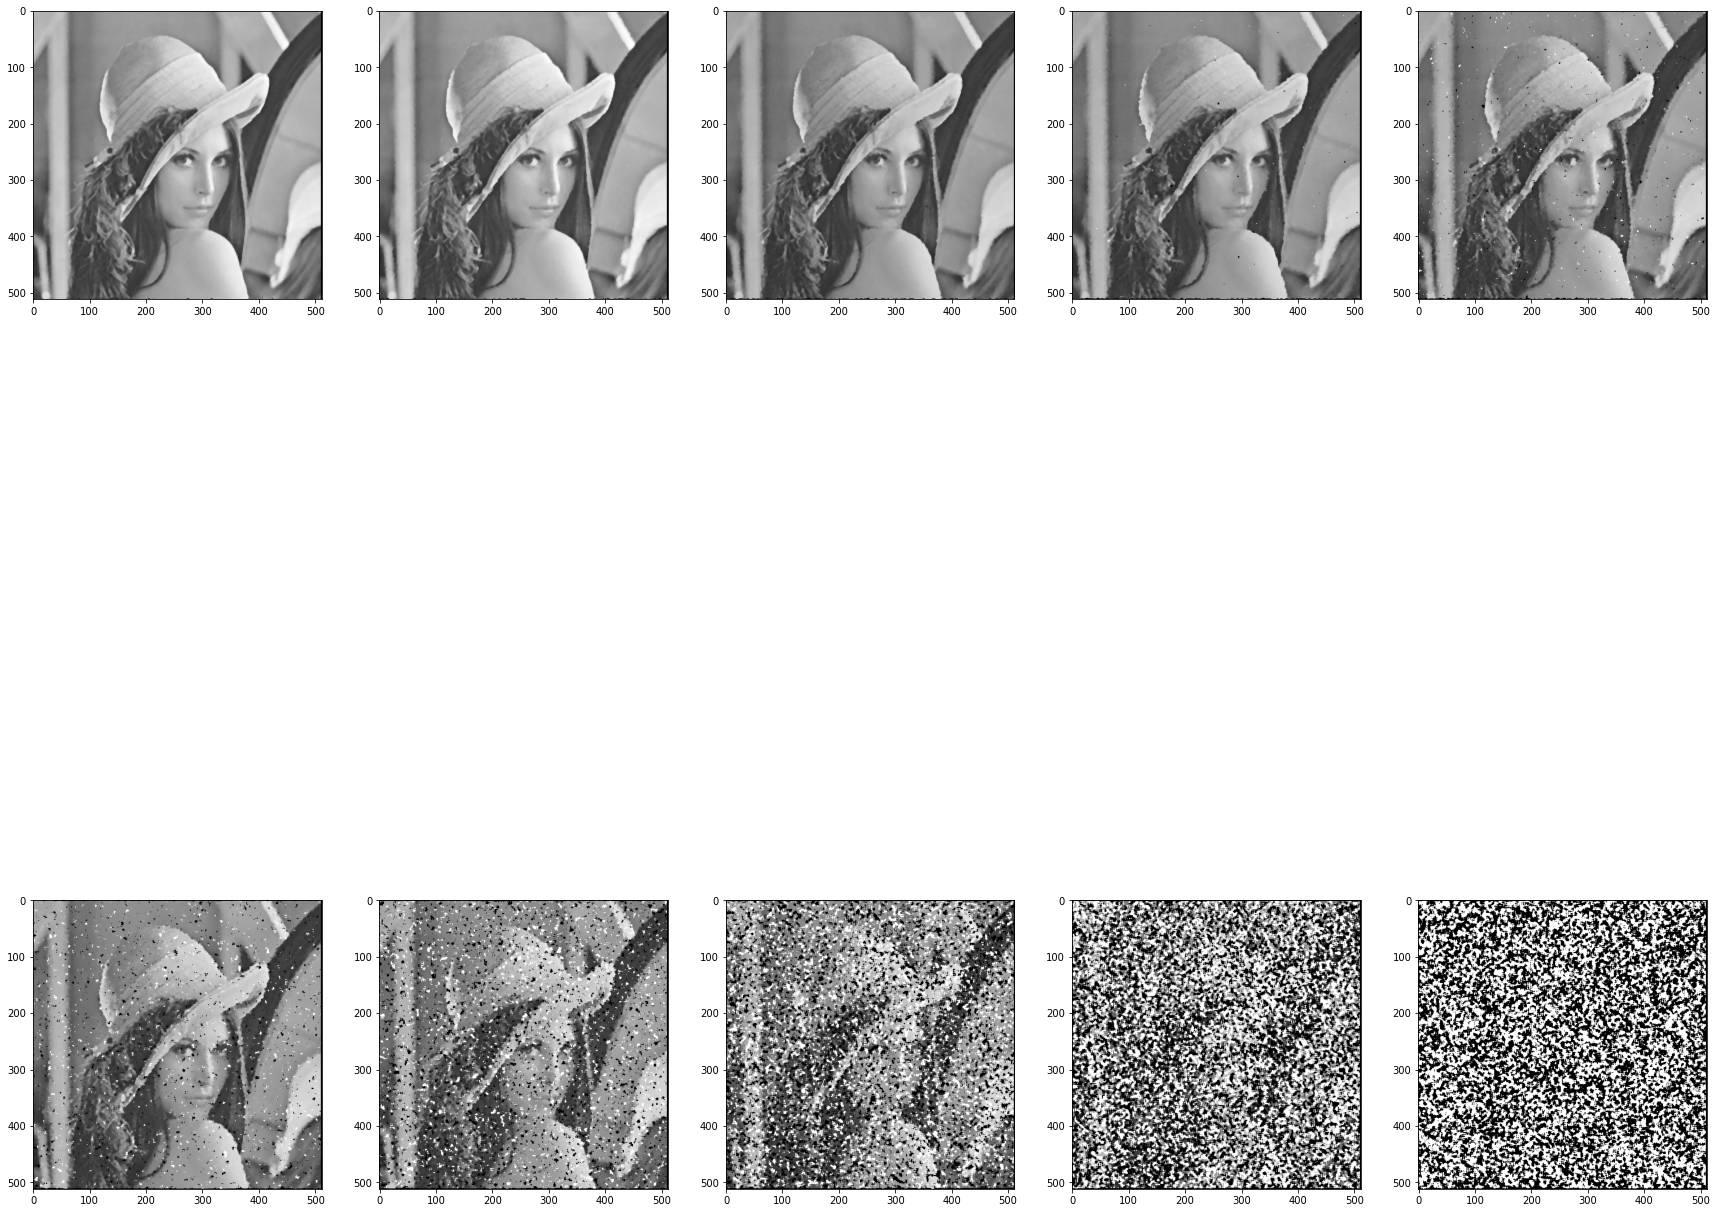

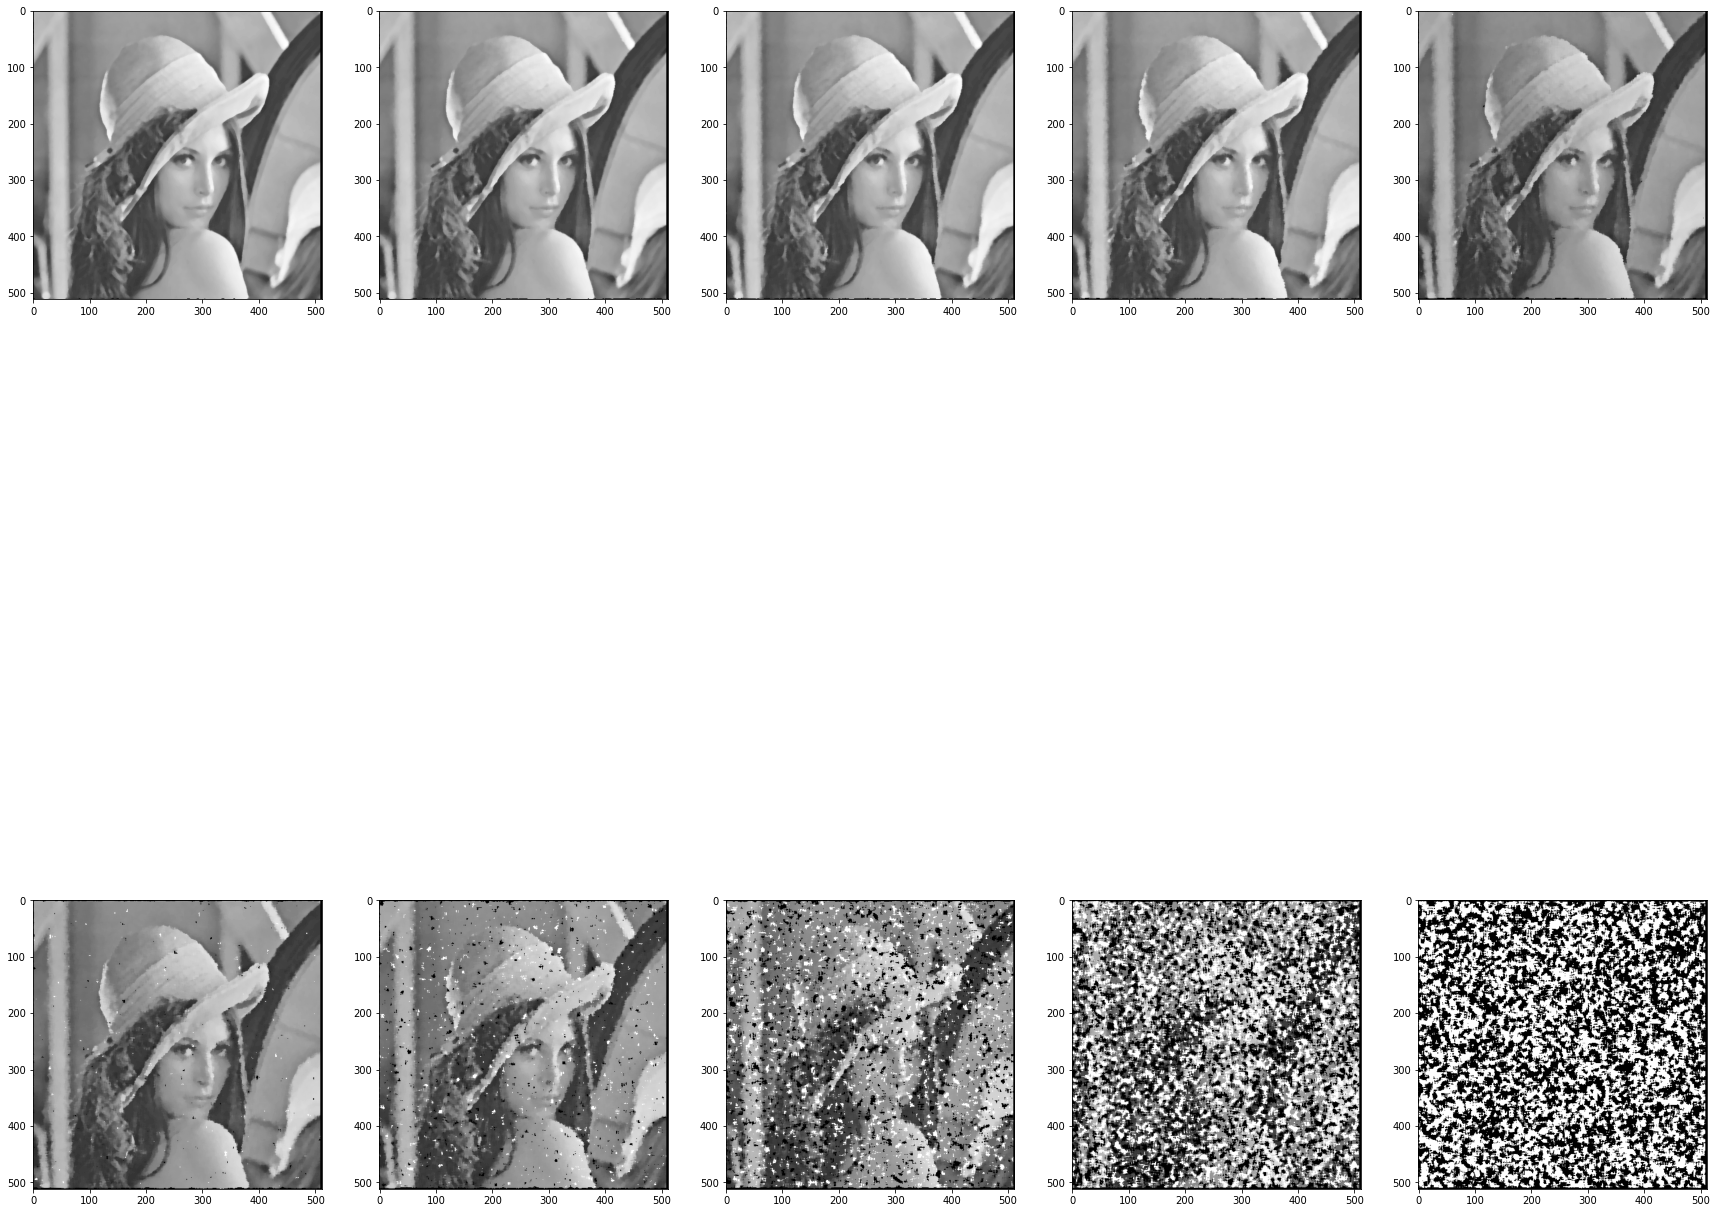

In [49]:
plt.figure(figsize=(30,30))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(median_filtered3[i], cmap='gray')

plt.figure(figsize=(30,30))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(median_filtered5[i], cmap='gray')

plt.figure(figsize=(30,30))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(median_filtered7[i], cmap='gray')